### Practica 2 VISION POR COMPUTADOR 😊

Empezamos importando las librerias necesarias

In [21]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import random
import mediapipe as mp # pip install mediapipe    o en caso de problemas    pip install mediapipe --user
import pygame  # pip install pygame


Cargamos la imagen desde archivo y convierte a RGB

In [22]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Conversión de la imagen a niveles de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Obtiene contornos
canny = cv2.Canny(gris, 100, 200)

Contamos el número de píxeles no nulos por columna y visualizar (refactorizando el codigo de profesor en una funcion para poder reutilizarlo)

Valor máximo de píxeles blancos por columna: 0.365234375
Número de columnas con más del 95% del valor máximo: 6
Posiciones de las columnas con más del 95% del valor máximo: [ 92  99 104 115 119 383]


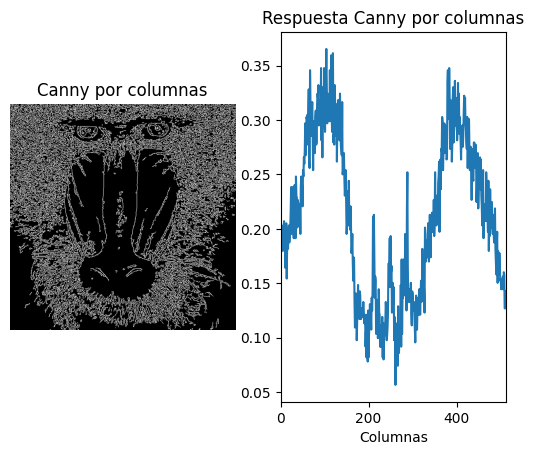

In [23]:
def CannyToColPlot(canny, title):
    col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    cols = col_counts[0] / (255 * canny.shape[0])
    maxcol = np.max(cols)
    threshold = 0.95 * maxcol
    columnas_con_maximos = np.where(cols >= threshold)[0]

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.title(f"{title} por columnas")
    plt.imshow(canny, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title(f"Respuesta {title} por columnas")
    plt.xlabel("Columnas")
    plt.ylabel("% píxeles")
    plt.plot(cols)
    plt.xlim([0, canny.shape[1]])

    print(f"Valor máximo de píxeles blancos por columna: {maxcol}")
    print(f"Número de columnas con más del 95% del valor máximo: {len(columnas_con_maximos)}")
    print(f"Posiciones de las columnas con más del 95% del valor máximo: {columnas_con_maximos}")
    
    return columnas_con_maximos, maxcol

columnas_canny, maxcol_canny = CannyToColPlot(canny, "Canny")


**TAREA 1**: Realizar la cuenta de píxeles blancos por filas (en lugar de por columnas). Determinar el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

Valor máximo de píxeles blancos por fila: 0.4296875
Número de filas con más del 95% del valor máximo: 2
Posiciones de las filas con más del 95% del valor máximo: [ 12 100]


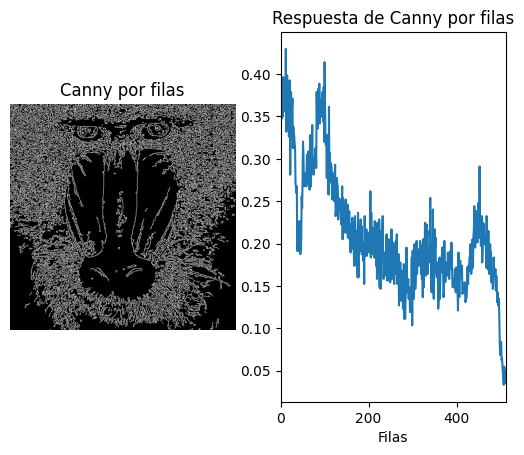

In [24]:
def CannyToRowPlot(canny, text):
    row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    rows = row_counts[:, 0] / (255 * canny.shape[1])
    maxfil = np.max(rows)
    threshold = 0.95 * maxfil
    filas_con_maximos = np.where(rows >= threshold)[0]

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.title(f"{text}")
    plt.imshow(canny, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(f"Respuesta de {text}")
    plt.xlabel("Filas")
    plt.ylabel("% píxeles")
    plt.plot(rows)
    plt.xlim([0, canny.shape[0]])

    print(f"Valor máximo de píxeles blancos por fila: {maxfil}")
    print(f"Número de filas con más del 95% del valor máximo: {len(filas_con_maximos)}")
    print(f"Posiciones de las filas con más del 95% del valor máximo: {filas_con_maximos}")
    
    return filas_con_maximos, maxfil

filas_canny, maxfil_canny = CannyToRowPlot(canny, "Canny por filas")

**TAREA 2**: Aplicar umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realizar el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcular el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. 

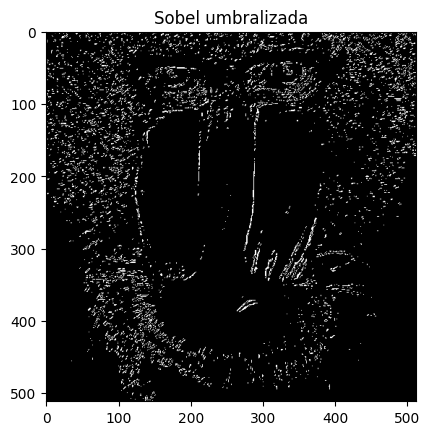

Valor máximo de píxeles blancos por columna: 0.150390625
Número de columnas con más del 95% del valor máximo: 2
Posiciones de las columnas con más del 95% del valor máximo: [287 288]

Valor máximo de píxeles blancos por fila: 0.13671875
Número de filas con más del 95% del valor máximo: 7
Posiciones de las filas con más del 95% del valor máximo: [ 7 11 51 52 79 82 85]


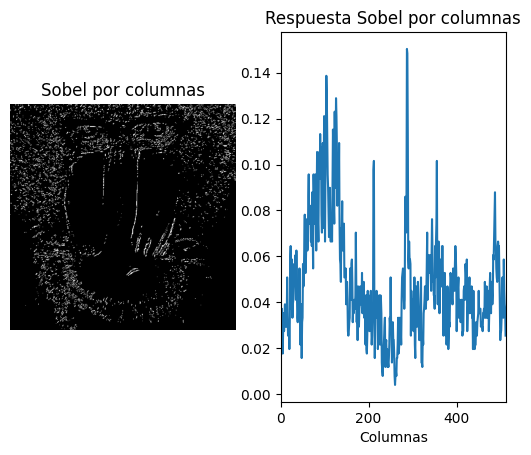

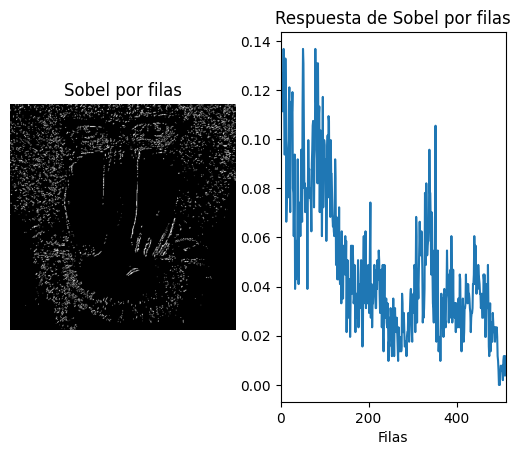

In [26]:
# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

# Ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)

sobel = cv2.add(sobelx, sobely)

valorUmbral = 170

sobel8 = np.uint8(np.abs(sobel)) # Convertimos la imagen a 8 bits

#Obtenemos la imagen umbralizada
res, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

plt.imshow(imagenUmbralizada, cmap='gray')
plt.title(f"Sobel umbralizada")
plt.show()

columnas_sobel, maxcol_sobel = CannyToColPlot(imagenUmbralizada, "Sobel")
print("")
filas_sobel, maxfil_sobel = CannyToRowPlot(imagenUmbralizada, "Sobel por filas")

Remarcamos con una primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

La línea roja son las filas que tienen valor máximo
La línea azul son las columnas que tienen valor máximo


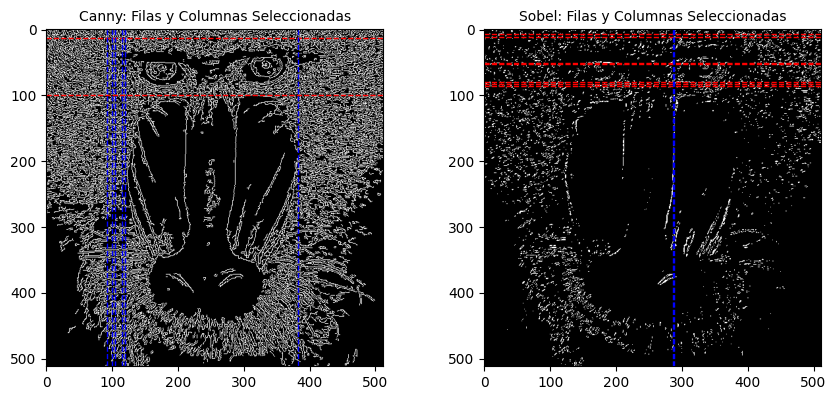

In [27]:
def RemarcarFilasColumnas(ax, imagen, filas, columnas, titulo):
    ax.imshow(imagen, cmap='gray')
    ax.set_title(titulo, fontsize=10)
    
    for fila in filas:
        ax.axhline(y=fila, color='red', linestyle='--', linewidth=1)
    
    for columna in columnas:
        ax.axvline(x=columna, color='blue', linestyle='--', linewidth=1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

print("La línea roja son las filas que tienen valor máximo")
print("La línea azul son las columnas que tienen valor máximo")

RemarcarFilasColumnas(axes[0], canny, filas_canny, columnas_canny, "Canny: Filas y Columnas Seleccionadas")
RemarcarFilasColumnas(axes[1], imagenUmbralizada, filas_sobel, columnas_sobel, "Sobel: Filas y Columnas Seleccionadas")
plt.subplots_adjust(wspace=0.3)
plt.show()


Visualizamos las diferencias en un histograma

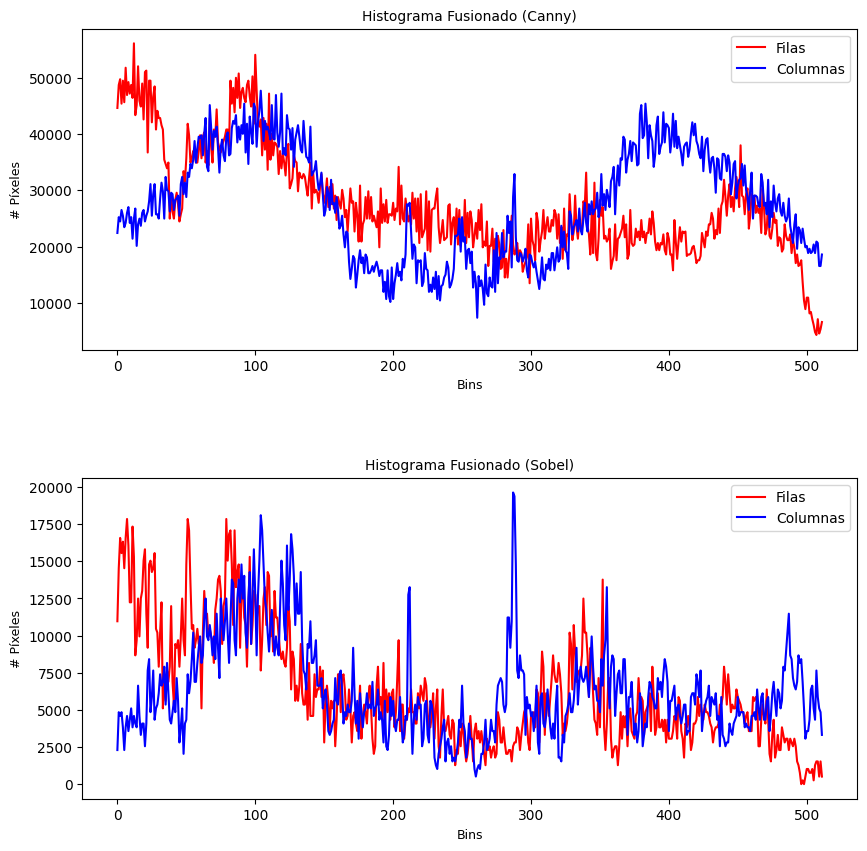

In [28]:
def HistogramaFusionado(ax, hist_filas, hist_columnas, titulo):
    ax.set_title(titulo, fontsize=10)
    ax.set_xlabel("Bins", fontsize=9)
    ax.set_ylabel("# Píxeles", fontsize=9)
    
    ax.plot(hist_filas, color='red', label='Filas')
    ax.plot(hist_columnas, color='blue', label='Columnas')
    ax.legend()

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Histograma fusionado Canny
hist_filas_canny = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32S).flatten()
hist_columnas_canny = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32S).flatten()
HistogramaFusionado(axes[0], hist_filas_canny, hist_columnas_canny, "Histograma Fusionado (Canny)")

# Histograma fusionado Sobel
hist_filas_sobel = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32S).flatten()
hist_columnas_sobel = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32S).flatten()
HistogramaFusionado(axes[1], hist_filas_sobel, hist_columnas_sobel, "Histograma Fusionado (Sobel)")

plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.show()



**TAREA 3 :** Proponer un demostrador que capture las imágenes de la cámara que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [29]:
def normal(frame):
    cv2.imshow('Imagen original', frame)

def NormalToCanny(frame):
    canny = cv2.Canny(frame, 100, 400)
    cv2.imshow('Imagen Canny', canny)
    
def segmentacion_color_azul(frame):
    # Convertir la imagen de BGR a HSV
    hsv, lower_blue, upper_blue = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV), np.array([100, 150, 50]), np.array([140, 255, 255])
    
    # Crear una máscara que detecte los píxeles dentro del rango del color azul,  
    # es un array donde los valores que no se encuentren en el intervalo valen cero
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    # Crear la imagen en escala de grises, podría tener color pero al haberla convertido primero a escala de grises se vería en blanco y negro
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_colored = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    
    # Combinar la imagen en color con la imagen en escala de grises usando la máscara
    resultado = np.where(mask[:, :, np.newaxis] != 0, frame, gray_colored)
    
    cv2.imshow('Segmentacion de color (Azul)', resultado)
    
def filtro_sepia(frame):
    sepia_filter = np.array([[0.272, 0.534, 0.131], [0.349, 0.686, 0.168], [0.393, 0.769, 0.189]])
    sepia = cv2.transform(frame, sepia_filter)
    cv2.imshow('Filtro Sepia', sepia)

Despues de dejar los metodos preparados llamamos a la camara para poder aplicar los distintos modos con las teclas 1,2,3 y escape

In [31]:
vid, modo = cv2.VideoCapture(0), 0

while(True):
    ret, frame = vid.read()
    if ret:
        if modo == 0: normal(frame)
        if modo == 1: NormalToCanny(frame)
        if modo == 2: segmentacion_color_azul(frame)
        if modo == 3: filtro_sepia(frame)
    
    # Detecta teclas presionadas
    key = cv2.waitKey(20)
    
    if key == 27:  # Tecla ESC para salir
        break
    elif key == ord('0'):  # Tecla '0' para volver a la imagen original
        cv2.destroyAllWindows()
        modo = 0
    elif key == ord('1'):  # Tecla '1' para el modo de movimiento
        cv2.destroyAllWindows()
        modo = 1
    elif key == ord('2'):  # Tecla '2' Segmentacion del color azul
        cv2.destroyAllWindows()
        modo = 2
    elif key == ord('3'):  # Tecla '3' Filtro modo sepia
        cv2.destroyAllWindows()
        modo = 3
        
vid.release()

cv2.destroyAllWindows()

**TAREA 4**: Tras ver el video de  [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) decidimos proponer un demostrador parecido al de Virtual air guitar pero con un piano, donde el usuario una vez ponga las dos manos en la pantalla podra tocar un piano como si fuese de verdad.

Lo primero para poder resolver esta tarea es decompnerlo en partes, por lo que lo primero es poder detectar las manos, para ello tomamos un codigo de partida, el cual modificamos ciertas partes para nuestra demostracion [Codigo de partida en Medium](https://lvimuth.medium.com/hand-detection-in-python-using-opencv-and-mediapipe-30c7b54f5ff4)

In [32]:
class HandTrackingDynamic:
    def __init__(self, mode=False, maxHands=2, detectionCon=0.5, trackCon=0.5):
        self.__mode__ = mode
        self.__maxHands__ = maxHands
        self.__detectionCon__ = detectionCon
        self.__trackCon__ = trackCon
        self.handsMp = mp.solutions.hands
        self.hands = self.handsMp.Hands(max_num_hands=maxHands)
        self.mpDraw = mp.solutions.drawing_utils
        self.tipIds = [4, 8, 12, 16, 20]  # las puntas de los dedos

    def findFingers(self, frame):
        imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB)
        return frame

    def findPosition(self, frame):
        hands_positions = []
        if self.results.multi_hand_landmarks:
            for handLms in self.results.multi_hand_landmarks:
                lmsList = []
                for id, lm in enumerate(handLms.landmark):
                    h, w, c = frame.shape
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    lmsList.append([id, cx, cy])

                hands_positions.append(lmsList)

                # Dibuja el contorno de la mano
                self.draw_glove(frame, lmsList)

        return hands_positions

    def draw_glove(self, frame, lmsList):
        points = [(lm[1], lm[2]) for lm in lmsList]

        # Agregar la muñeca a los puntos
        wrist_x = lmsList[0][1]
        wrist_y = lmsList[0][2] + 50  
        points.insert(0, (wrist_x, wrist_y))

        points = np.array(points, dtype=np.int32)

        # Dibuja el contorno de la mano 
        cv2.fillPoly(frame, [points], (255, 255, 255))  
        cv2.polylines(frame, [points], isClosed=True, color=(255, 255, 255), thickness=10)  

    def findFingerUp(self, lmsList):
        fingers = []
        if lmsList[self.tipIds[0]][1] > lmsList[self.tipIds[0] - 1][1]:
            fingers.append(1)
        else:
            fingers.append(0)

        for id in range(1, 5):
            if lmsList[self.tipIds[id]][2] < lmsList[self.tipIds[id] - 2][2]:
                fingers.append(1)
            else:
                fingers.append(0)

        return fingers

Lo siguiente a tener en cuenta es que tenemos que tener los audios de piano para que el usuario pueda tocar el piano

In [33]:
def play_sound(zone, sustained=False):
    volume = random.uniform(0.5, 1.0) 
    sound = None

    if sustained:
        sound_files = [
            'air_piano_sounds/do_stretched.wav',
            'air_piano_sounds/re_stretched.wav',
            'air_piano_sounds/mi_stretched.wav',
            'air_piano_sounds/fa_stretched.wav',
            'air_piano_sounds/sol_stretched.wav',
            'air_piano_sounds/la_stretched.wav',
            'air_piano_sounds/si_stretched.wav',
            'air_piano_sounds/do_octave_stretched.wav'
        ]
    else:
        sound_files = [
            'air_piano_sounds/do.wav',
            'air_piano_sounds/re.wav',
            'air_piano_sounds/mi.wav',
            'air_piano_sounds/fa.wav',
            'air_piano_sounds/sol.wav',
            'air_piano_sounds/la.wav',
            'air_piano_sounds/si.wav',
            'air_piano_sounds/do_octave.wav'
        ]

    if 1 <= zone <= 8:
        sound = pygame.mixer.Sound(sound_files[zone - 1])
        sound.set_volume(volume)
        sound.play()

Preparamos los metodos para que el usuario detecte cuando esta en modo air piano y cuando no dibujando las zonas, indicandoselo con texto y demas

In [34]:
def is_piano_posture(fingers):
    # Definimos la postura de piano
    return fingers[1] == 1 and fingers[2] == 1 and fingers[3] == 1 and fingers[4] == 1

def draw_centered_text(frame, text, font_scale, color):
    (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 2)
    
    center_x = (frame.shape[1] - text_width) // 2
    center_y = (text_height + 30)  

    for dx in [-1, 0, 1]:
        cv2.putText(frame, text, (center_x + dx, center_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, 2)

def draw_zones(frame, zone_states):
    zone_width = frame.shape[1] // 8
    for i in range(8):
        x_start = i * zone_width
        x_end = (i + 1) * zone_width
        color = (50, 50, 50)  # Color base de las zonas es oscuro
        if zone_states[i]:
            color = (0, 255, 0)  # Color verde para zonas activas
        cv2.rectangle(frame, (x_start, 0), (x_end, frame.shape[0]), color, 2)
        notas = ['Do', 'Re', 'Mi', 'Fa', 'Sol', 'La', 'Si', 'Do']
        cv2.putText(frame, notas[i], (x_start + 10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)


Una vez todo listo vamos tomando la camara y cuando las dos manos esten juntas cada movimiento de los dedos del usuario hara sonar el piano

In [35]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='google.protobuf.symbol_database') # Ignorar advertencia de protobuf 

def main():
    pygame.mixer.init() 
    cap = cv2.VideoCapture(0)
    detector = HandTrackingDynamic()
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280) 

    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    sustained_notes = [False] * 8  # Estado de las notas sostenidas
    zone_states = [False] * 8  

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Cerrar con la tecla 'Escape'
        key = cv2.waitKey(1) & 0xFF
        if key == 27:
            break

        frame = detector.findFingers(frame)
        hands_positions = detector.findPosition(frame)

        if len(hands_positions) == 2:

            for handLms in hands_positions:
                if len(handLms) != 0:
                    fingers = detector.findFingerUp(handLms)                    
                    # Revisar si hay dedos en la postura de piano
                    if is_piano_posture(fingers):
                        if len(fingers) >= 8:
                            for i in range(1, 9):
                                if fingers[i] == 1:
                                    if not sustained_notes[i - 1]:
                                        play_sound(i, sustained=True)
                                        sustained_notes[i - 1] = True
                                        zone_states[i - 1] = True  
                                else:
                                    sustained_notes[i - 1] = False 
                                    zone_states[i - 1] = False  
                    else:
                        # Obtenemos coordenadas del dedo índice
                        x, y = handLms[8][1], handLms[8][2]

                        # Dividimos la pantalla en 8 zonas y reproducir sonido basado en la posición
                        current_zone = min(max((x // (frame.shape[1] // 8)) + 1, 1), 8) 
                        play_sound(current_zone)
                        zone_states[current_zone - 1] = True 

            overlay = frame.copy()
            alpha = 0.3 
            cv2.rectangle(overlay, (0, 0), (frame.shape[1], 100), (0, 0, 0), -1)
            cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)
            draw_zones(frame, zone_states)
            draw_centered_text(frame, 'Air Piano', 1, (255, 255, 255))

        cv2.imshow('Air Piano use your hands', frame)

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()
